## Installing ASReview and plugins

In [ ]:
#%%capture
#!pip install asreview
!pip install git+https://github.com/asreview/asreview.git
!pip install asreview-visualization

In [ ]:
from asreviewcontrib.visualization.plot import Plot

In [1]:
#%%capture
!pip install git+https://github.com/JTeijema/asreview-plugin-model-switcher.git --upgrade
!pip install git+https://github.com/JTeijema/asreview-plugin-model-cnn-17-layer.git --upgrade

thon39\lib\site-packages (from tensorflow->asreview-plugin-model-switcher==0.3) (1.1.2)
  Created wheel for asreview-plugin-model-switcher: filename=asreview_plugin_model_switcher-0.3-py3-none-any.whl size=8030 sha256=aa6782ef54536e00860cd2ebfd23d68f9421959cf5060bb6e3279b5ca8e83aae
  Stored in directory: C:\Users\jjtei\AppData\Local\Temp\pip-ephem-wheel-cache-ccjcdamk\wheels\e7\13\f0\4f2059fc04dd5d47e861d3f33da21c2e82f23b4d55f1fc3318
Successfully built asreview-plugin-model-switcher
  Running command git clone -q https://github.com/JTeijema/asreview-plugin-model-switcher.git 'C:\Users\jjtei\AppData\Local\Temp\pip-req-build-yjuqs09s'
You should consider upgrading via the 'c:\users\jjtei\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
  Cloning https://github.com/JTeijema/asreview-plugin-model-cnn-17-layer.git to c:\users\jjtei\appdata\local\temp\pip-req-build-g8qtp4ua
  Running command git clone -q https://github.com/JTeijema/asreview-plugin-mode

# Exploring original recall curve

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m nb -e tfidf --state_file "..\output\NB.h5" --n_instances 20 --n_queries min --seed 1 --init_seed 1

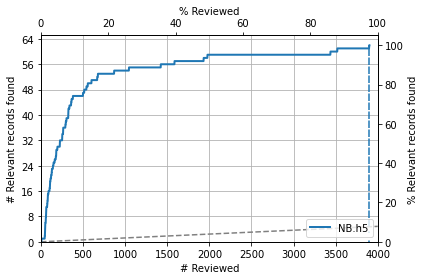

In [10]:
with Plot.from_paths(['..\\output\\NB.h5']) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4000)
  inc_plot.set_legend()
  inc_plot.add_wss("NB.h5", value=100, add_text=False)
  inc_plot.add_random(add_text=False)
  inc_plot.show()
  inc_plot.save("..\\output\\NB_plot.png")

# Extract processed files from switch point

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m nb -e tfidf --state_file "..\output\NB_extract_classified_papers.h5" --n_instances 20 --n_queries min --seed 1 --init_seed 1 -n 379

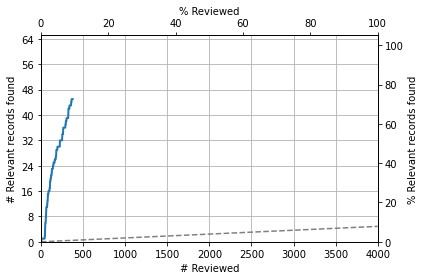

In [11]:
with Plot.from_paths(['..\\output\\NB_extract_classified_papers.h5']) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4000)
  #inc_plot.set_legend()
  #inc_plot.add_wss("NB.h5", value=100, add_text=False)
  inc_plot.add_random(add_text=False)
  inc_plot.show()
  inc_plot.save("..\\output\\NB_extract_classified_papers_plot.png")

# Random Simulations

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m nb -e tfidf -s "..\\output\\nb_379.h5" --n_instances 20 -n 4000 --n_prior_included 43 --n_prior_excluded 333 --seed 1  --init_seed 1

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m svm -e doc2vec -s "..\\output\\svm_379.h5" --n_instances 20 -n 4000 --n_prior_included 43 --n_prior_excluded 333 --seed 1  --init_seed 1

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m nn-2-layer -e doc2vec -s "..\\output\\nn_379.h5" --n_instances 20 -n 4000 --n_prior_included 43 --n_prior_excluded 333 --seed 1  --init_seed 1

In [2]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m power_cnn -e doc2vec -s "..\\output\\cnn_379.h5" --n_instances 20 -n 4000 --n_prior_included 43 --n_prior_excluded 333 --seed 1  --init_seed 1

^C


In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m power_lstm -e doc2vec -s "..\\output\\lstm_379.h5" --n_instances 20 -n 4000 --n_prior_included 43 --n_prior_excluded 333 --seed 1  --init_seed 1

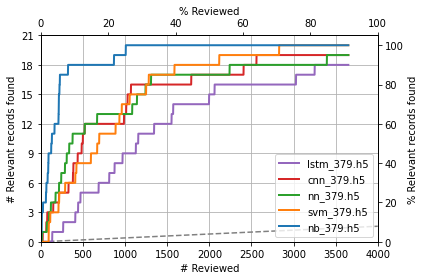

In [13]:
with Plot.from_paths(["..\\output\\nb_379.h5", "..\\output\\svm_379.h5", "..\\output\\nn_379.h5", "..\\output\\cnn_379.h5", "..\\output\\lstm_379.h5"]) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4000)
  inc_plot.set_legend()
  inc_plot.add_random(add_text=False)
  #inc_plot.add_wss('nb_379.h5', value=100, add_text=False)
  inc_plot.show()
  inc_plot.save("..\\output\\randomprior_plot.png")

# Directed simulations

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m nb -e tfidf -s "..\\output\\prior_nb_379.h5" --n_instances 20 -n 4000 --seed 1 --prior_idx 16392 4277 26835 33252 24639 10559 26162 17929 34294 2436 16985 28502 27948 15950 6542 17723 16382 6377 12502 13371 18137 8166 24181 26654 25010 30376 5419 31133 28225 22868 27747 17287 23341 45069 35216 12317 32520 24636 12090 48333 28648 22310 28824 49574 13560 34618 16815 27967 15824 3363 14154 47170 13241 18033 41232 18204 13322 17468 26605 16739 32664 27343 12866 18093 26174 14780 18196 12548 14955 11101 17818 14487 34619 11131 34802 16655 11911 18384 47739 32658 18365 26878 16654 14306 31020 35998 47373 18023 12707 47372 18611 17631 11757 31777 46656 14781 13020 3281 15196 17201 7738 11337 32452 29497 48493 48492 15057 1064 33992 14066 31673 30498 32549 10429 31193 17396 10673 10833 33163 17677 3120 8163 15858 34904 31088 19670 33181 34690 15000 26708 21236 31386 3141 11174 50583 29997 35555 50584 31441 29496 22102 30229 31259 12964 11972 47781 26328 14753 48047 31229 15524 29725 11333 47308 7103 11492 31990 18259 11300 9926 19815 16482 50904 32983 14678 20699 26277 11621 12875 3897 14310 2203 12189 26861 36010 11759 27097 14681 3896 12871 996  18473 50935 34689 17265 33895 31738 11073 31280 12299 32644 34070 30064 15616 33178 33991 18296 11873 3937 23853 3152 12348 11843 13296 16353 3078 11808 17753 34683 15538 14313 15953 11327 21884 27376 23285 28559 49589 12698 31687 11606 15452 31867 21122 21123 50933 49985 50418 23277 25361 27752 13428 11877 23266 23265 49984 48193 34607 10954 14216 10459 31917 11760 50299 3142 12168 30047 11947 31422 31178 50520 25136 19573 10994 31824 3107 16559 33475 47394 32705 1023 14944 17490 16828 11767 25453 31791 33672 23681 25426 25424 11784 11304 10   11369 11021 24910 25811 14577 11171 47501 47500 30010 11755 13809 5448 13726 5792 2546 11066 17465 4543 35568 10590 30940 11908 50613 35788 10036 12366 16368 8195 3280 32082 10524 17023 14664 14665 48743 12720 16425 17988 11138 27598 8086 27030 5836 50614 11817 32523 30144 19873 13486 34081 7040 12718 12170 18076 18431 31038 14492 21862 19809 31177 25685 12103 14941 13311 18430 16984 17940 7512 8568 14899 35097 18009 18029 15312 2495 16990 2423 1627 30548 15441 3912 32548 50524 17266 1857 50060 35591 16513 

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m svm -e doc2vec -s "..\\output\\prior_svm_379.h5" --n_instances 20 -n 4000 --seed 1 --prior_idx 16392 4277 26835 33252 24639 10559 26162 17929 34294 2436 16985 28502 27948 15950 6542 17723 16382 6377 12502 13371 18137 8166 24181 26654 25010 30376 5419 31133 28225 22868 27747 17287 23341 45069 35216 12317 32520 24636 12090 48333 28648 22310 28824 49574 13560 34618 16815 27967 15824 3363 14154 47170 13241 18033 41232 18204 13322 17468 26605 16739 32664 27343 12866 18093 26174 14780 18196 12548 14955 11101 17818 14487 34619 11131 34802 16655 11911 18384 47739 32658 18365 26878 16654 14306 31020 35998 47373 18023 12707 47372 18611 17631 11757 31777 46656 14781 13020 3281 15196 17201 7738 11337 32452 29497 48493 48492 15057 1064 33992 14066 31673 30498 32549 10429 31193 17396 10673 10833 33163 17677 3120 8163 15858 34904 31088 19670 33181 34690 15000 26708 21236 31386 3141 11174 50583 29997 35555 50584 31441 29496 22102 30229 31259 12964 11972 47781 26328 14753 48047 31229 15524 29725 11333 47308 7103 11492 31990 18259 11300 9926 19815 16482 50904 32983 14678 20699 26277 11621 12875 3897 14310 2203 12189 26861 36010 11759 27097 14681 3896 12871 996  18473 50935 34689 17265 33895 31738 11073 31280 12299 32644 34070 30064 15616 33178 33991 18296 11873 3937 23853 3152 12348 11843 13296 16353 3078 11808 17753 34683 15538 14313 15953 11327 21884 27376 23285 28559 49589 12698 31687 11606 15452 31867 21122 21123 50933 49985 50418 23277 25361 27752 13428 11877 23266 23265 49984 48193 34607 10954 14216 10459 31917 11760 50299 3142 12168 30047 11947 31422 31178 50520 25136 19573 10994 31824 3107 16559 33475 47394 32705 1023 14944 17490 16828 11767 25453 31791 33672 23681 25426 25424 11784 11304 10   11369 11021 24910 25811 14577 11171 47501 47500 30010 11755 13809 5448 13726 5792 2546 11066 17465 4543 35568 10590 30940 11908 50613 35788 10036 12366 16368 8195 3280 32082 10524 17023 14664 14665 48743 12720 16425 17988 11138 27598 8086 27030 5836 50614 11817 32523 30144 19873 13486 34081 7040 12718 12170 18076 18431 31038 14492 21862 19809 31177 25685 12103 14941 13311 18430 16984 17940 7512 8568 14899 35097 18009 18029 15312 2495 16990 2423 1627 30548 15441 3912 32548 50524 17266 1857 50060 35591 16513 

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m nn-2-layer -e doc2vec -s "..\\output\\prior_nn_379.h5" --n_instances 20 -n 4000 --seed 1 --prior_idx 16392 4277 26835 33252 24639 10559 26162 17929 34294 2436 16985 28502 27948 15950 6542 17723 16382 6377 12502 13371 18137 8166 24181 26654 25010 30376 5419 31133 28225 22868 27747 17287 23341 45069 35216 12317 32520 24636 12090 48333 28648 22310 28824 49574 13560 34618 16815 27967 15824 3363 14154 47170 13241 18033 41232 18204 13322 17468 26605 16739 32664 27343 12866 18093 26174 14780 18196 12548 14955 11101 17818 14487 34619 11131 34802 16655 11911 18384 47739 32658 18365 26878 16654 14306 31020 35998 47373 18023 12707 47372 18611 17631 11757 31777 46656 14781 13020 3281 15196 17201 7738 11337 32452 29497 48493 48492 15057 1064 33992 14066 31673 30498 32549 10429 31193 17396 10673 10833 33163 17677 3120 8163 15858 34904 31088 19670 33181 34690 15000 26708 21236 31386 3141 11174 50583 29997 35555 50584 31441 29496 22102 30229 31259 12964 11972 47781 26328 14753 48047 31229 15524 29725 11333 47308 7103 11492 31990 18259 11300 9926 19815 16482 50904 32983 14678 20699 26277 11621 12875 3897 14310 2203 12189 26861 36010 11759 27097 14681 3896 12871 996  18473 50935 34689 17265 33895 31738 11073 31280 12299 32644 34070 30064 15616 33178 33991 18296 11873 3937 23853 3152 12348 11843 13296 16353 3078 11808 17753 34683 15538 14313 15953 11327 21884 27376 23285 28559 49589 12698 31687 11606 15452 31867 21122 21123 50933 49985 50418 23277 25361 27752 13428 11877 23266 23265 49984 48193 34607 10954 14216 10459 31917 11760 50299 3142 12168 30047 11947 31422 31178 50520 25136 19573 10994 31824 3107 16559 33475 47394 32705 1023 14944 17490 16828 11767 25453 31791 33672 23681 25426 25424 11784 11304 10   11369 11021 24910 25811 14577 11171 47501 47500 30010 11755 13809 5448 13726 5792 2546 11066 17465 4543 35568 10590 30940 11908 50613 35788 10036 12366 16368 8195 3280 32082 10524 17023 14664 14665 48743 12720 16425 17988 11138 27598 8086 27030 5836 50614 11817 32523 30144 19873 13486 34081 7040 12718 12170 18076 18431 31038 14492 21862 19809 31177 25685 12103 14941 13311 18430 16984 17940 7512 8568 14899 35097 18009 18029 15312 2495 16990 2423 1627 30548 15441 3912 32548 50524 17266 1857 50060 35591 16513 

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m power_cnn -e doc2vec -s "..\\output\\prior_cnn_379.h5" --n_instances 20 -n 4000 --seed 1 --prior_idx 16392 4277 26835 33252 24639 10559 26162 17929 34294 2436 16985 28502 27948 15950 6542 17723 16382 6377 12502 13371 18137 8166 24181 26654 25010 30376 5419 31133 28225 22868 27747 17287 23341 45069 35216 12317 32520 24636 12090 48333 28648 22310 28824 49574 13560 34618 16815 27967 15824 3363 14154 47170 13241 18033 41232 18204 13322 17468 26605 16739 32664 27343 12866 18093 26174 14780 18196 12548 14955 11101 17818 14487 34619 11131 34802 16655 11911 18384 47739 32658 18365 26878 16654 14306 31020 35998 47373 18023 12707 47372 18611 17631 11757 31777 46656 14781 13020 3281 15196 17201 7738 11337 32452 29497 48493 48492 15057 1064 33992 14066 31673 30498 32549 10429 31193 17396 10673 10833 33163 17677 3120 8163 15858 34904 31088 19670 33181 34690 15000 26708 21236 31386 3141 11174 50583 29997 35555 50584 31441 29496 22102 30229 31259 12964 11972 47781 26328 14753 48047 31229 15524 29725 11333 47308 7103 11492 31990 18259 11300 9926 19815 16482 50904 32983 14678 20699 26277 11621 12875 3897 14310 2203 12189 26861 36010 11759 27097 14681 3896 12871 996  18473 50935 34689 17265 33895 31738 11073 31280 12299 32644 34070 30064 15616 33178 33991 18296 11873 3937 23853 3152 12348 11843 13296 16353 3078 11808 17753 34683 15538 14313 15953 11327 21884 27376 23285 28559 49589 12698 31687 11606 15452 31867 21122 21123 50933 49985 50418 23277 25361 27752 13428 11877 23266 23265 49984 48193 34607 10954 14216 10459 31917 11760 50299 3142 12168 30047 11947 31422 31178 50520 25136 19573 10994 31824 3107 16559 33475 47394 32705 1023 14944 17490 16828 11767 25453 31791 33672 23681 25426 25424 11784 11304 10   11369 11021 24910 25811 14577 11171 47501 47500 30010 11755 13809 5448 13726 5792 2546 11066 17465 4543 35568 10590 30940 11908 50613 35788 10036 12366 16368 8195 3280 32082 10524 17023 14664 14665 48743 12720 16425 17988 11138 27598 8086 27030 5836 50614 11817 32523 30144 19873 13486 34081 7040 12718 12170 18076 18431 31038 14492 21862 19809 31177 25685 12103 14941 13311 18430 16984 17940 7512 8568 14899 35097 18009 18029 15312 2495 16990 2423 1627 30548 15441 3912 32548 50524 17266 1857 50060 35591 16513 

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m power_lstm -e doc2vec -s "..\\output\\prior_lstm_379.h5" --n_instances 20 -n 4000 --seed 1 --prior_idx 16392 4277 26835 33252 24639 10559 26162 17929 34294 2436 16985 28502 27948 15950 6542 17723 16382 6377 12502 13371 18137 8166 24181 26654 25010 30376 5419 31133 28225 22868 27747 17287 23341 45069 35216 12317 32520 24636 12090 48333 28648 22310 28824 49574 13560 34618 16815 27967 15824 3363 14154 47170 13241 18033 41232 18204 13322 17468 26605 16739 32664 27343 12866 18093 26174 14780 18196 12548 14955 11101 17818 14487 34619 11131 34802 16655 11911 18384 47739 32658 18365 26878 16654 14306 31020 35998 47373 18023 12707 47372 18611 17631 11757 31777 46656 14781 13020 3281 15196 17201 7738 11337 32452 29497 48493 48492 15057 1064 33992 14066 31673 30498 32549 10429 31193 17396 10673 10833 33163 17677 3120 8163 15858 34904 31088 19670 33181 34690 15000 26708 21236 31386 3141 11174 50583 29997 35555 50584 31441 29496 22102 30229 31259 12964 11972 47781 26328 14753 48047 31229 15524 29725 11333 47308 7103 11492 31990 18259 11300 9926 19815 16482 50904 32983 14678 20699 26277 11621 12875 3897 14310 2203 12189 26861 36010 11759 27097 14681 3896 12871 996  18473 50935 34689 17265 33895 31738 11073 31280 12299 32644 34070 30064 15616 33178 33991 18296 11873 3937 23853 3152 12348 11843 13296 16353 3078 11808 17753 34683 15538 14313 15953 11327 21884 27376 23285 28559 49589 12698 31687 11606 15452 31867 21122 21123 50933 49985 50418 23277 25361 27752 13428 11877 23266 23265 49984 48193 34607 10954 14216 10459 31917 11760 50299 3142 12168 30047 11947 31422 31178 50520 25136 19573 10994 31824 3107 16559 33475 47394 32705 1023 14944 17490 16828 11767 25453 31791 33672 23681 25426 25424 11784 11304 10   11369 11021 24910 25811 14577 11171 47501 47500 30010 11755 13809 5448 13726 5792 2546 11066 17465 4543 35568 10590 30940 11908 50613 35788 10036 12366 16368 8195 3280 32082 10524 17023 14664 14665 48743 12720 16425 17988 11138 27598 8086 27030 5836 50614 11817 32523 30144 19873 13486 34081 7040 12718 12170 18076 18431 31038 14492 21862 19809 31177 25685 12103 14941 13311 18430 16984 17940 7512 8568 14899 35097 18009 18029 15312 2495 16990 2423 1627 30548 15441 3912 32548 50524 17266 1857 50060 35591 16513 

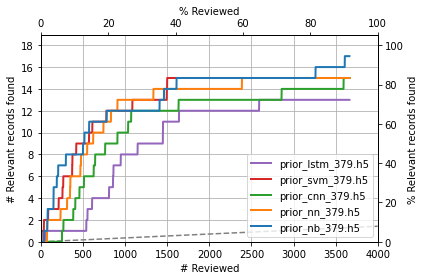

In [14]:
with Plot.from_paths(["..\\output\\prior_nb_379.h5", "..\\output\\prior_nn_379.h5", "..\\output\\prior_cnn_379.h5", "..\\output\\prior_svm_379.h5", "..\\output\\prior_lstm_379.h5"]) as plot: 
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4000)
  inc_plot.set_legend()
  inc_plot.add_random(add_text=False)
  inc_plot.add_wss('prior_nb_379.h5', value=100, add_text=False)
  inc_plot.show()
  inc_plot.save("..\\output\\prior_plot.png")

# Other

In [ ]:
!pip install git+https://github.com/JTeijema/asreview-plugin-wide-doc2vec.git

In [ ]:
!asreview simulate "..\\data\\brouwer_2019.csv" -m power_cnn -e wide_doc2vec -s "..\\output\\extra_wide_prior_cnn_379.h5" --n_instances 20 -n 4000 --seed 1 --prior_idx 16392 4277 26835 33252 24639 10559 26162 17929 34294 2436 16985 28502 27948 15950 6542 17723 16382 6377 12502 13371 18137 8166 24181 26654 25010 30376 5419 31133 28225 22868 27747 17287 23341 45069 35216 12317 32520 24636 12090 48333 28648 22310 28824 49574 13560 34618 16815 27967 15824 3363 14154 47170 13241 18033 41232 18204 13322 17468 26605 16739 32664 27343 12866 18093 26174 14780 18196 12548 14955 11101 17818 14487 34619 11131 34802 16655 11911 18384 47739 32658 18365 26878 16654 14306 31020 35998 47373 18023 12707 47372 18611 17631 11757 31777 46656 14781 13020 3281 15196 17201 7738 11337 32452 29497 48493 48492 15057 1064 33992 14066 31673 30498 32549 10429 31193 17396 10673 10833 33163 17677 3120 8163 15858 34904 31088 19670 33181 34690 15000 26708 21236 31386 3141 11174 50583 29997 35555 50584 31441 29496 22102 30229 31259 12964 11972 47781 26328 14753 48047 31229 15524 29725 11333 47308 7103 11492 31990 18259 11300 9926 19815 16482 50904 32983 14678 20699 26277 11621 12875 3897 14310 2203 12189 26861 36010 11759 27097 14681 3896 12871 996 18473 50935 34689 17265 33895 31738 11073 31280 12299 32644 34070 30064 15616 33178 33991 18296 11873 3937 23853 3152 12348 11843 13296 16353 3078 11808 17753 34683 15538 14313 15953 11327 21884 27376 23285 28559 49589 12698 31687 11606 15452 31867 21122 21123 50933 49985 50418 23277 25361 27752 13428 11877 23266 23265 49984 48193 34607 10954 14216 10459 31917 11760 50299 3142 12168 30047 11947 31422 31178 50520 25136 19573 10994 31824 3107 16559 33475 47394 32705 1023 14944 17490 16828 11767 25453 31791 33672 23681 25426 25424 11784 11304 10 11369 11021 24910 25811 14577 11171 47501 47500 30010 11755 13809 5448 13726 5792 2546 11066 17465 4543 35568 10590 30940 11908 50613 35788 10036 12366 16368 8195 3280 32082 10524 17023 14664 14665 48743 12720 16425 17988 11138 27598 8086 27030 5836 50614 11817 32523 30144 19873 13486 34081 7040 12718 12170 18076 18431 31038 14492 21862 19809 31177 25685 12103 14941 13311 18430 16984 17940 7512 8568 14899 35097 18009 18029 15312 2495 16990 2423 1627 30548 15441 3912 32548 50524 17266 1857 50060 35591 16513

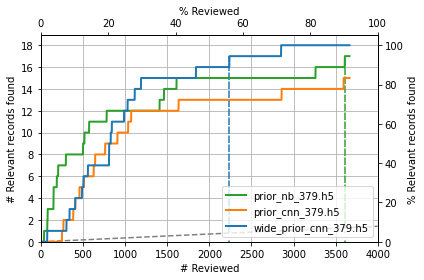

In [15]:
with Plot.from_paths(["..\\output\\wide_prior_cnn_379.h5", "..\\output\\prior_cnn_379.h5", "..\\output\\prior_nb_379.h5"]) as plot:
  inc_plot = plot.new("inclusion", result_format="number")
  inc_plot.set_grid()
  inc_plot.set_xlim(0, 4000)
  inc_plot.set_legend()
  inc_plot.add_random(add_text=False)
  inc_plot.add_wss('wide_prior_cnn_379.h5', value=90, add_text=False)
  inc_plot.add_wss('prior_nb_379.h5', value=90, add_text=False)
  inc_plot.show()
  inc_plot.save("..\\output\\wide_prior_plot.png")